# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

Valores faltantes antes da correção:
Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64


<ipython-input-65-49abaa53ee5e>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
<ipython-input-65-49abaa53ee5e>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.pointplot(x="posse_de_veiculo", y="renda", dodge=True, ci='sd', data=df)



Valores faltantes após a correção:
Unnamed: 0               0
data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64


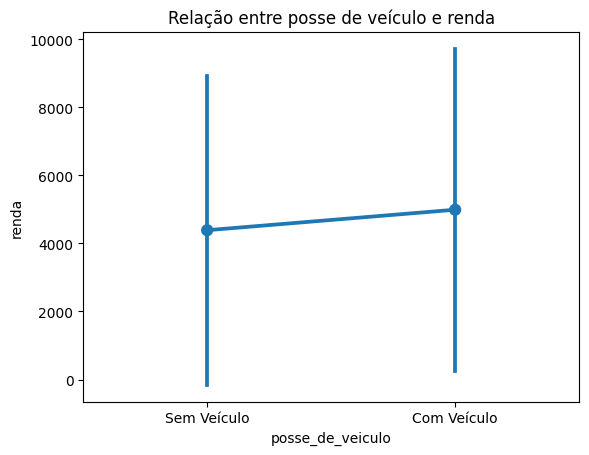

<ipython-input-65-49abaa53ee5e>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.pointplot(x="posse_de_veiculo", y="renda", hue="posse_de_imovel", dodge=True, ci='sd', data=df)


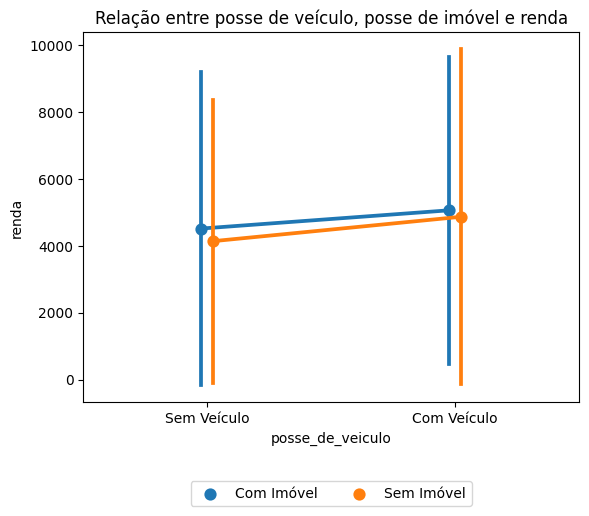

Testando a diferença de renda entre quem possui e não possui veículo:
T-statistic: 7.712332220715903
P-value: 1.3324346963629964e-14
A diferença é estatisticamente significativa.


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Carregue o conjunto de dados
df = pd.read_csv('/content/previsao_de_renda.csv')

# Visualize as primeiras linhas do DataFrame
df.head()

# Verifique se há valores faltantes
print("Valores faltantes antes da correção:")
print(df.isnull().sum())

# Preencha os valores faltantes nas colunas numéricas com a média
df.fillna(df.mean(), inplace=True)

# Verifique novamente se há valores faltantes após a correção
print("\nValores faltantes após a correção:")
print(df.isnull().sum())

# Converta os valores booleanos em rótulos categóricos
df['posse_de_imovel'] = df['posse_de_imovel'].map({True: 'Com Imóvel', False: 'Sem Imóvel'})
df['posse_de_veiculo'] = df['posse_de_veiculo'].map({True: 'Com Veículo', False: 'Sem Veículo'})

# Crie um gráfico de ponto para analisar a relação entre posse de veículo e renda
ax = sns.pointplot(x="posse_de_veiculo", y="renda", dodge=True, ci='sd', data=df)

# Adicione um título ao gráfico
plt.title('Relação entre posse de veículo e renda')

# Mostre o gráfico
plt.show()

# Crie um gráfico de ponto para analisar a relação entre posse de veículo, posse de imóvel e renda
ax = sns.pointplot(x="posse_de_veiculo", y="renda", hue="posse_de_imovel", dodge=True, ci='sd', data=df)

# Adicione um título ao gráfico
plt.title('Relação entre posse de veículo, posse de imóvel e renda')

# Mostre o gráfico
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)
plt.show()

# Divida o DataFrame em dois com base na posse de veículo
possui_veiculo = df[df['posse_de_veiculo'] == 'Com Veículo']
nao_possui_veiculo = df[df['posse_de_veiculo'] == 'Sem Veículo']

# Realize um teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(possui_veiculo['renda'], nao_possui_veiculo['renda'], equal_var=False)

# Imprima o resultado
print(f'Testando a diferença de renda entre quem possui e não possui veículo:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Verifique a significância estatística (geralmente, usa-se um limiar de 0.05)
if p_value < 0.05:
    print('A diferença é estatisticamente significativa.')
else:
    print('Não há evidência estatística de diferença significativa na renda.')
